In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_path= 'data/diamonds.csv'
diamonds = pd.read_csv(data_path)

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.shape

(53940, 10)

In [6]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [7]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

In [8]:
diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [11]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


diamonds[diamonds['price']>300]

In [15]:
nan_per_col = diamonds.isna().sum()
nan_per_col

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [14]:
top_corr_features = diamonds.corr().loc['price'].apply(np.abs).sort_values(ascending=False)
top_corr_features


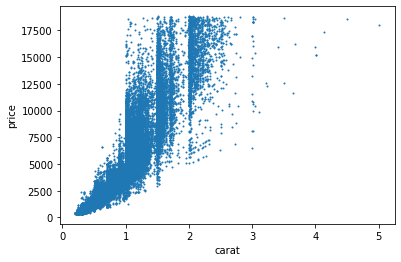

In [16]:
diamonds.plot.scatter(x='carat', y='price', s=1);

In [17]:
diamonds['carat_squared'] = diamonds['carat']**2

In [19]:
diamonds['carat_squared']

0        0.0529
1        0.0441
2        0.0529
3        0.0841
4        0.0961
          ...  
53935    0.5184
53936    0.5184
53937    0.4900
53938    0.7396
53939    0.5625
Name: carat_squared, Length: 53940, dtype: float64

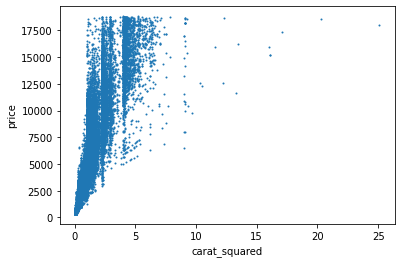

In [20]:
diamonds.plot.scatter(x='carat_squared', y='price', s=1);

In [23]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['NULL', 'MLR', 'KNN', 'LASSO'])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [22]:
target_name = 'price'
robust_scaler = RobustScaler()
x = diamonds.drop('price', axis=1)
x = robust_scaler.fit_transform(x)
y = diamonds[target_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

### NULL

In [24]:
y_pred_null = y_train.mean()
models.loc['train_mse', 'NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
models.loc['test_mse', 'NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

### MLR

In [34]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

models.loc['train_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_train), y_true=y_train)

models.loc['test_mse', 'MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test)

### KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=15, weights='distance', metric='euclidean')
knn.fit(x_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_train), 
                                                    y_true=y_train)

models.loc['test_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_test), 
                                                   y_true=y_test)

In [43]:
models

,NULL,MLR,KNN,LASSO
train_mse,15923897.02723,1250840.996968,27.322407,NaN
test_mse,15881144.435486,1248901.790126,586063.761674,NaN


In [44]:
models

,NULL,MLR,KNN,LASSO
train_mse,15923897.02723,1250840.996968,27.322407,NaN
test_mse,15881144.435486,1248901.790126,586063.761674,NaN


train_mse	15923897.02723	1250840.996968	27.322407	NaN
test_mse	15881144.435486	1248901.790126	583110.999614	NaN

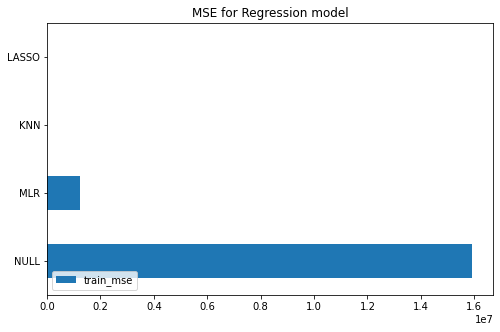

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['train_mse'].plot(kind='barh', ax=ax)
ax.set_title('MSE for Regression model')
ax.legend(loc=3);

In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

lasso.fit(x_train, y_train)

models.loc['train_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_train), 
                                                    y_true=y_train)

models.loc['test_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), 
                                                   y_true=y_test)

In [53]:
models

,NULL,MLR,KNN,LASSO,Lasso
train_mse,15923897.02723,1250840.996968,27.322407,1256531.499967,NaN
test_mse,15881144.435486,1248901.790126,586063.761674,1258117.77299,1.258118e+06


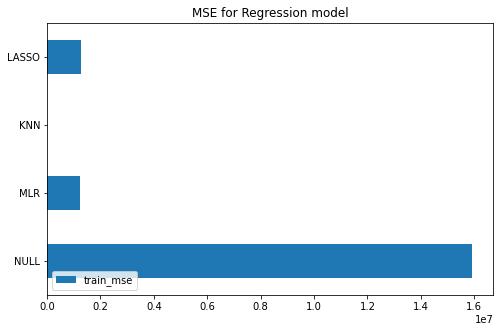

In [58]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['train_mse'].plot(kind='barh', ax=ax)
ax.set_title('MSE for Regression model')
ax.legend(loc=3);

In [56]:
models.drop('Lasso', axis=1, inplace=True)

In [57]:
models

,NULL,MLR,KNN,LASSO
train_mse,15923897.02723,1250840.996968,27.322407,1256531.499967
test_mse,15881144.435486,1248901.790126,586063.761674,1258117.77299
